### 核方法
线性和二次核计算代码

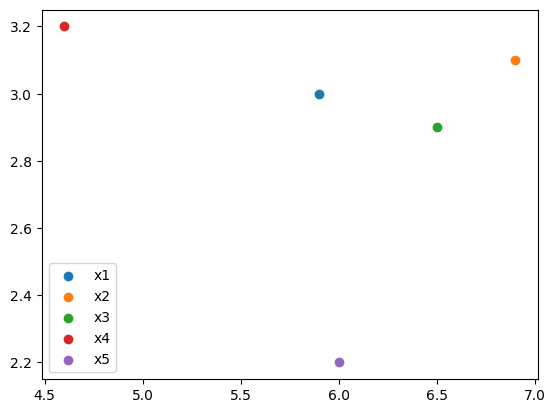

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# iris数据集的样本点
x1 = np.array([5.9, 3])
x2 = np.array([6.9, 3.1])
x3 = np.array([6.5, 2.9])
x4 = np.array([4.6, 3.2])
x5 = np.array([6, 2.2])

## 绘制数据点
plt.scatter(x1[0], x1[1], label='x1')
plt.scatter(x2[0], x2[1], label='x2')
plt.scatter(x3[0], x3[1], label='x3')
plt.scatter(x4[0], x4[1], label='x4')
plt.scatter(x5[0], x5[1], label='x5')

plt.legend()
plt.show()

In [12]:
## 计算核矩阵
n = 5
K = np.zeros((n, n))

X = np.array([x1, x2, x3, x4, x5])
Y = np.array([x1, x2, x3, x4, x5])

for i in range(n):
    for j in range(n):
        K[i,j] = X[i]@Y[j] # 线性核 

print(K)

[[43.81 50.01 47.05 36.74 42.  ]
 [50.01 57.22 53.84 41.66 48.22]
 [47.05 53.84 50.66 39.18 45.38]
 [36.74 41.66 39.18 31.4  34.64]
 [42.   48.22 45.38 34.64 40.84]]


In [15]:
## 二次核
## 非线性映射函数
def phi(x):
    return np.array([x[0]**2, x[1]**2, np.sqrt(2)*x[0]*x[1]])

## 二次核函数
def K(x, y):
    return (x.T@y)**2  # K(x, y)=(x'y)^2

print('特征空间中的点乘值: {:.4f}'.format(phi(x1)@phi(x2)))
print('二次核函数计算: {:.4f}'.format(K(x1, x2)))

特征空间中的点乘值: 2501.0001
二次核函数计算: 2501.0001


In [20]:
## 特征空间中的点乘操作可以转换为核矩阵上的操作
## 计算5个点在特征空间的二范数的平方
## 考虑线性映射
def get_mu():
    mu = np.zeros([1, 2])
    for x in X:
        mu += x
    return mu / 5

mu = get_mu()
print('均值向量的二范数的平方：{:.4f}'.format(np.linalg.norm(mu)**2))

均值向量的二范数的平方：44.0548


In [23]:
## 使用核矩阵计算

## 线性核矩阵
n = 5
K = np.zeros((n, n))

X = np.array([x1, x2, x3, x4, x5])
Y = np.array([x1, x2, x3, x4, x5])

for i in range(n):
    for j in range(n):
        K[i,j] = X[i]@Y[j] # 线性核 
    

def get_mu_from_K():
    return np.mean(K)

get_mu_from_K()

44.05479999999999

Mercer核

In [28]:
## 将核矩阵K进行特征值分解
np.linalg.eig(K)

(array([ 2.22658531e+02,  1.27146891e+00, -1.03039603e-14,  1.23273335e-14,
         3.61389607e-15]),
 array([[-0.44341882,  0.15570008,  0.47403702,  0.1156957 ,  0.21224146],
        [-0.50681878, -0.14505866,  0.25679048, -0.82595649,  0.52101292],
        [-0.47685405, -0.15289967,  0.23486088,  0.48688169, -0.8192631 ],
        [-0.37049617,  0.81098449, -0.43898216,  0.0809081 , -0.03387673],
        [-0.42644727, -0.52310737, -0.67932509,  0.24659782,  0.10563823]]))

In [29]:
# 特征值：lambda1: 222.66 lambda2: 1.27 lambda3=lambda4=lambda5=0
Lam = np.array([
    [222.65, 0],
    [0, 1.27]
])

# 特征向量 非零特征值对应的特征向量为u1和u2, 即前两列
U = np.array([
    [-0.443, 0.156], 
    [-0.507, -0.145],
    [-0.477, -0.153],
    [-0.370, 0.811],
    [-0.426, -0.523]
])

s_Lam = np.sqrt(Lam)

# 确定Mercer核
phi_x_1 = s_Lam@U[0,:]
phi_x_2 = s_Lam@U[1,:]

In [32]:
# 计算点乘
phi_x_1@phi_x_2

49.97868525

In [33]:
K # K(x1, x2)=50.01 很接近 49.97

array([[43.81, 50.01, 47.05, 36.74, 42.  ],
       [50.01, 57.22, 53.84, 41.66, 48.22],
       [47.05, 53.84, 50.66, 39.18, 45.38],
       [36.74, 41.66, 39.18, 31.4 , 34.64],
       [42.  , 48.22, 45.38, 34.64, 40.84]])